In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

Initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity. As a result of the interviews with pharmacists, decision was made that the subject of analyses and forecasting will be actual drug categories, instead of the individual drugs. Thus, selected group of drugs (57 drugs) is classified to 8 Anatomical Therapeutic Chemical (ATC) Classification System categories:

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances<br>
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives <br>
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives<br>
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides <br>
N05B - Psycholeptics drugs, Anxiolytic drugs<br>
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs<br>
R03 - Drugs for obstructive airway diseases <br>
R06 - Antihistamines for systemic use <br>
ATC codes features are added to the dataset, namely a model has been transformed as indicated on the image below and data was resampled to the hourly time-series.

In [3]:
#Load Data
mon_sales = pd.read_csv('salesmonthly.csv')

In [4]:
mon_sales.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [5]:
mon_sales = mon_sales[["datum","R03","R06"]]

In [6]:
mon_sales.head()

,datum,R03,R06
0,2014-01-31,112.0,48.2
1,2014-02-28,122.0,36.2
2,2014-03-31,112.0,85.4
3,2014-04-30,97.0,73.7
4,2014-05-31,107.0,123.7


In [7]:
mon_sales = mon_sales.rename(columns={"datum":"Month", "R03":"obst_airways_drugs","R06":"antihistamines"})

In [8]:
mon_sales.head()

,Month,obst_airways_drugs,antihistamines
0,2014-01-31,112.0,48.2
1,2014-02-28,122.0,36.2
2,2014-03-31,112.0,85.4
3,2014-04-30,97.0,73.7
4,2014-05-31,107.0,123.7


In [9]:
mon_sales.tail()

,Month,obst_airways_drugs,antihistamines
65,2019-06-30,142.0,156.04
66,2019-07-31,115.0,105.20
67,2019-08-31,145.0,97.30
68,2019-09-30,161.0,109.10
69,2019-10-31,37.0,11.13


In [10]:
mon_sales['Month'] = pd.to_datetime(mon_sales['Month'])
mon_sales.set_index('Month', inplace = True)

In [11]:
mon_sales.head()

,obst_airways_drugs,antihistamines
Month,,
2014-01-31,112.0,48.2
2014-02-28,122.0,36.2
2014-03-31,112.0,85.4
2014-04-30,97.0,73.7
2014-05-31,107.0,123.7


In [12]:
y = mon_sales['obst_airways_drugs']

In [13]:
y.describe()

count     70.000000
mean     167.675000
std       81.767979
min        0.000000
25%      112.000000
50%      160.000000
75%      218.250000
max      386.000000
Name: obst_airways_drugs, dtype: float64

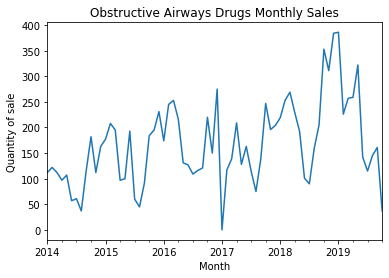

In [14]:
y.plot()
plt.title('Obstructive Airways Drugs Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity of sale')

plt.show()

### Modelling

In [15]:
y2 = mon_sales['antihistamines']

In [16]:
y2.describe()

count     70.000000
mean      86.662571
std       45.859336
min        0.000000
25%       49.875000
50%       74.100000
75%      119.807500
max      213.040000
Name: antihistamines, dtype: float64

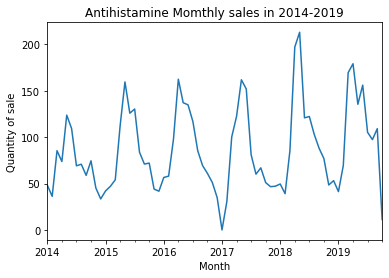

In [17]:
y2.plot()
plt.title('Antihistamine Momthly sales in 2014-2019')
plt.xlabel('Month')
plt.ylabel('Quantity of sale')

plt.show()

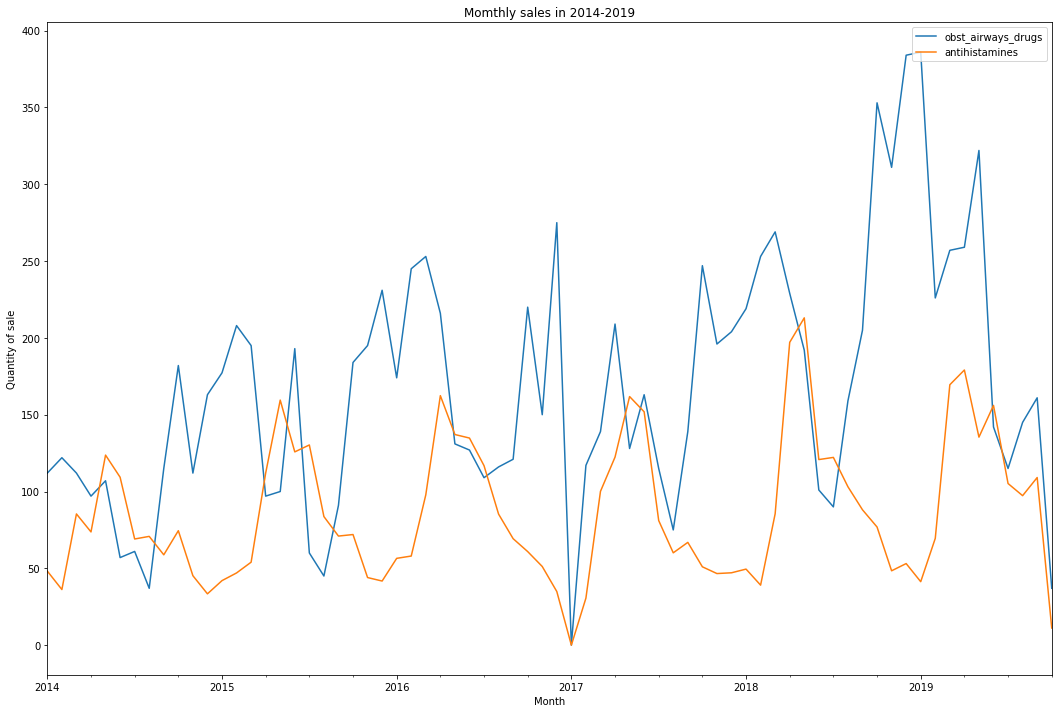

In [18]:
y.plot(figsize=(18, 12))
y2.plot(figsize=(18, 12))

plt.legend(['obst_airways_drugs', 'antihistamines'], loc = 'upper right')
plt.title('Momthly sales in 2014-2019')
plt.xlabel('Month')
plt.ylabel('Quantity of sale')

plt.show()

### Check for autcorrelation

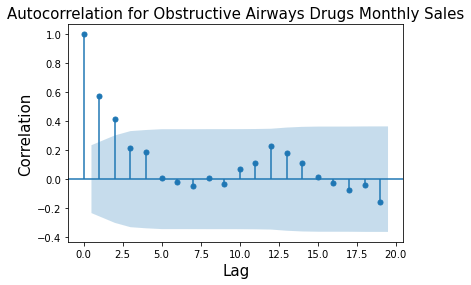

In [86]:
from statsmodels.graphics.tsaplots import plot_acf
# Autocorrelation for Obstructive Airways Drugs Monthly Sales
plot_acf(y)
plt.title("Autocorrelation for Obstructive Airways Drugs Monthly Sales", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()



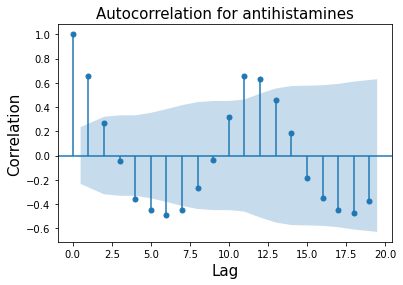

In [85]:
# Autocorrelation for antihistamines
plot_acf(y2)
plt.title("Autocorrelation for antihistamines", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

### Trend and seasonallity for Obstructive Airways Drugs Monthly Sales

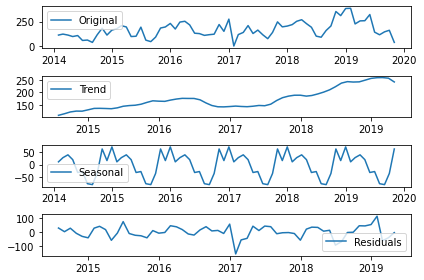

In [19]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition = seasonal_decompose(y)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Trend and seasonallity for antihistamine drugs monthly sales

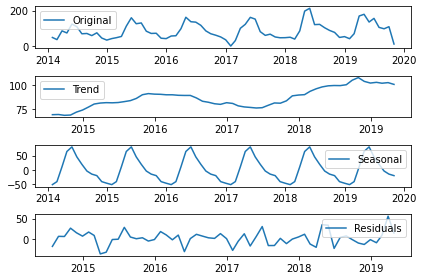

In [22]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition2 = seasonal_decompose(y2)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition2.trend
seasonal = decomposition2.seasonal
residual = decomposition2.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y2, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Testing for stationarity for Obstructive Airways Drugs Monthly Sales with KPSS

In [23]:

from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kwargs):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [24]:
kpss_test(y, regression='ct')

KPSS Statistic: 0.07551472306600479
p-value: 0.1
num lags: 11
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


### Testing for stationarity for Obstructive Airways Drugs Monthly Sales with ADF

In [29]:
# ADF test function
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
        print(f'Result: The series is {"not " if result[1] >= 0.05 else ""}stationary')

In [30]:
# call adf_test func
adf_test(y)

ADF Statistic: -4.019375933017451
p-value: 0.001312383291560873
Critial Values:
   1%, -3.528889992207215
Result: The series is stationary
Critial Values:
   5%, -2.9044395987933362
Result: The series is stationary
Critial Values:
   10%, -2.589655654274312
Result: The series is stationary


### Testing for stationarity for antihistamine drugs monthly sales with KPSS

In [93]:
# call kpss_test func
kpss_test(y2,  regression='ct)

KPSS Statistic: 0.47413989657348377
p-value: 0.04749101428525141
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


### Testing for stationarity for antihistamine drugs monthly sales with ADF

In [94]:
# call adf_test func
adf_test(y2)

ADF Statistic: -1.4336731485915033
p-value: 0.5660306144602514
Critial Values:
   1%, -3.5463945337644063
Result: The series is not stationary
Critial Values:
   5%, -2.911939409384601
Result: The series is not stationary
Critial Values:
   10%, -2.5936515282964665
Result: The series is not stationary


### Making the antihistamine drugs data stationary

Let's check the log plot of the time series data

<AxesSubplot:xlabel='Month'>

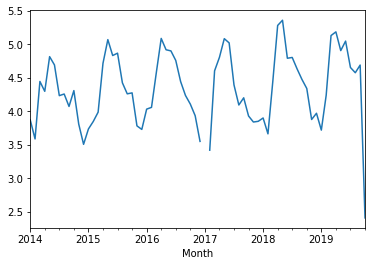

In [35]:
y2_log = np.log(y2)
y2_log.plot()

There are missing values in the middle of the time series which cannot be easily removed. Thus ADF test will not be possible.

In order to get a constant mean we difference a time series dataset when we create a new time series comprising the difference between the values of our existing dataset.

Let's check the difference plot of the time series data

<AxesSubplot:xlabel='Month'>

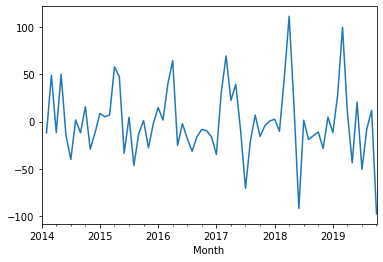

In [34]:
y2.diff().plot()

In [33]:
kpss_test(y2.diff().dropna())

KPSS Statistic: 0.34491766216462044
p-value: 0.1
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/ruserel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [45]:
adf_test(y2.diff().dropna())

ADF Statistic: -4.935568944830061
p-value: 2.972097998039771e-05
Critial Values:
   1%, -3.5506699942762414
Result: The series is stationary
Critial Values:
   5%, -2.913766394626147
Result: The series is stationary
Critial Values:
   10%, -2.5946240473991997
Result: The series is stationary


In [47]:
# the differenced data is stationary
y2_diff = y2.diff()

### The moving average model for Obstructive Airways Drugs Monthly Sales

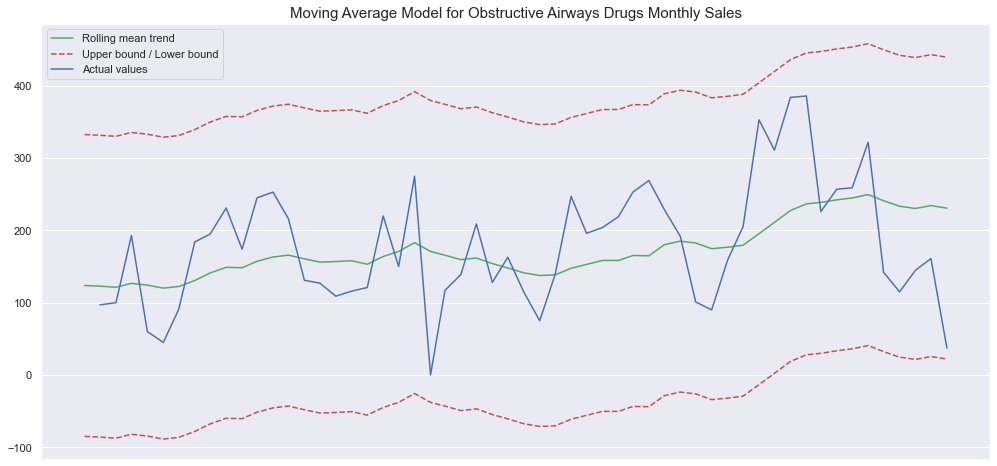

In [90]:

import seaborn as sns
sns.set()
from sklearn.metrics import mean_absolute_error
green = sns.color_palette("deep", 8)[2]
blue = sns.color_palette("deep", 8)[0]

series = y
window=15

rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))


plt.title('Moving Average Model for Obstructive Airways Drugs Monthly Sales',fontsize=15)

plt.plot(rolling_mean, color=green, label='Rolling mean trend')

#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 1.92 * deviation)
upper_bound = rolling_mean + (mae + 1.92 * deviation)

plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')

plt.plot(series[window:], color=blue,label='Actual values')


plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.show()

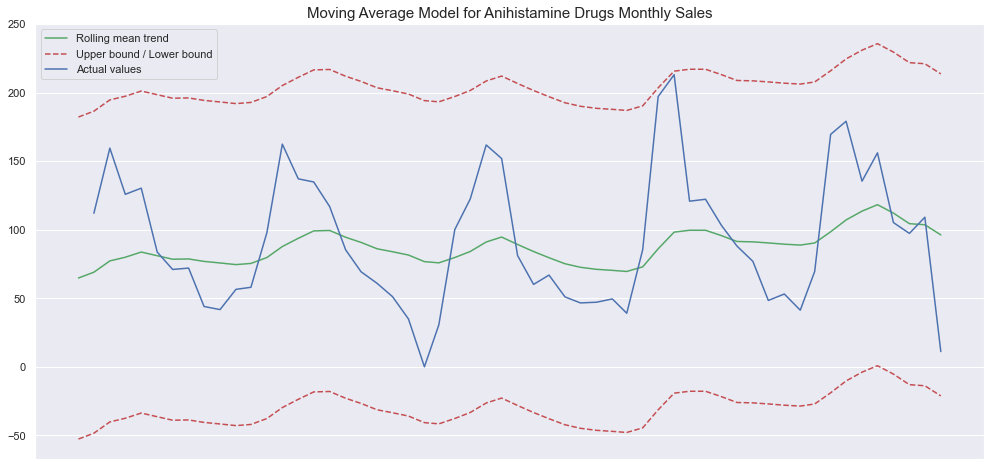

In [91]:
series = y2
window=15

rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))


plt.title('Moving Average Model for Anihistamine Drugs Monthly Sales',fontsize=15)

plt.plot(rolling_mean, color=green, label='Rolling mean trend')

#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 1.92 * deviation)
upper_bound = rolling_mean + (mae + 1.92 * deviation)

plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')

plt.plot(series[window:], color=blue,label='Actual values')

plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.show()

## The ARIMA model for Obstructive Airways Drugs Monthly Sales

In [49]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

### Function to find the MSE of a single ARIMA model

In [50]:
# function to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) 
    #  train and test variables
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

### Function to evaluate the different ARIMA models with different p, d, and q values

In [51]:
# function to evaluate different ARIMA models with several different p, d, and q values
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.12f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.12f' % (best_cfg, best_score))

In [96]:
#  selecting values for each parameter: p_values, d_values and q_values

p_values = [x for x in range(0, 6)]
d_values = [x for x in range(0, 6)]
q_values = [x for x in range(0, 6)]

In [55]:
#find the optimum ARIMA model for our data.
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=16821.450704520099
ARIMA(0, 0, 1) MSE=11543.946445249179
ARIMA(0, 0, 2) MSE=9068.554227823877
ARIMA(0, 0, 3) MSE=9303.322368400708
ARIMA(0, 0, 4) MSE=8743.293776265427
ARIMA(0, 0, 5) MSE=8698.827975490629
ARIMA(0, 1, 0) MSE=8077.677982244489
ARIMA(0, 1, 1) MSE=8764.439580244327
ARIMA(0, 1, 2) MSE=10294.737730510928
ARIMA(0, 1, 3) MSE=8726.514827642601
ARIMA(0, 1, 4) MSE=9016.810663625376
ARIMA(0, 1, 5) MSE=8859.227991238997
ARIMA(0, 2, 0) MSE=17273.136944858616
ARIMA(0, 2, 1) MSE=8337.515966045952
ARIMA(0, 2, 2) MSE=8932.707637201687
ARIMA(0, 2, 3) MSE=10791.583077267247
ARIMA(0, 2, 4) MSE=10177.956043761482
ARIMA(0, 2, 5) MSE=10335.729971486962
ARIMA(1, 0, 0) MSE=8796.708215484579
ARIMA(1, 0, 1) MSE=8781.371877464215
ARIMA(1, 0, 2) MSE=9454.781736617510
ARIMA(1, 1, 0) MSE=8327.547007763267
ARIMA(1, 1, 1) MSE=10151.107171898717
ARIMA(1, 2, 0) MSE=12711.304347297695
ARIMA(1, 2, 1) MSE=8627.214346284340
ARIMA(2, 0, 0) MSE=8810.950960279260
ARIMA(2, 0, 1) MSE=8754.57090

In [61]:
#So the best p,d, q, parameters for our ARIMA model are 0, 1, 0 respectively. Now we know this, we can build the model.

p,d,q = (0,1,0)
model = ARIMA(y, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

In [62]:
# summary of the model 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.obst_airways_drugs   No. Observations:                   69
Model:                   ARIMA(0, 1, 0)   Log Likelihood                -394.430
Method:                             css   S.D. of innovations             73.511
Date:                  Mon, 06 Jun 2022   AIC                            792.860
Time:                          05:27:01   BIC                            797.328
Sample:                      02-28-2014   HQIC                           794.632
                           - 10-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0870      8.850     -0.123      0.902     -18.432      16.258
==============================================================================
"""

### Visualize the results

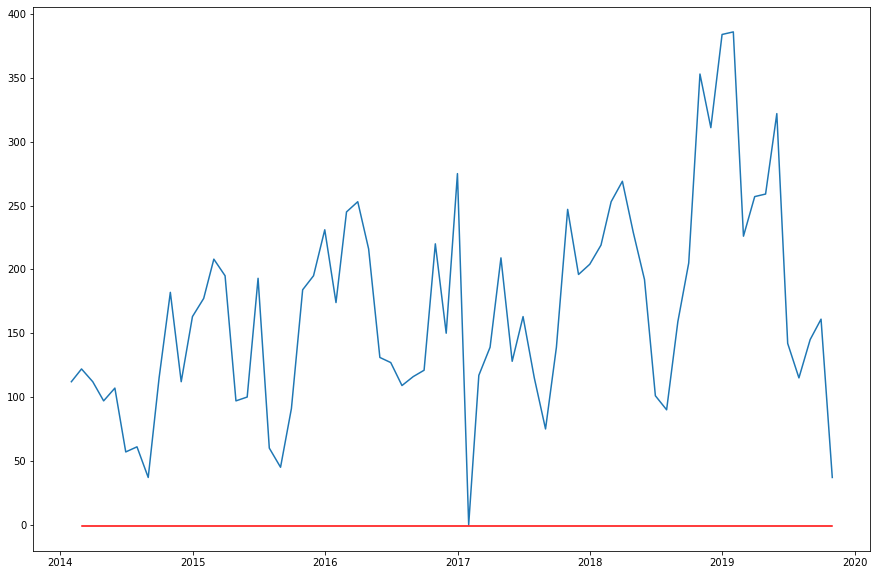

In [63]:

plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(model_fit.predict(), color = 'red')

## The ARIMA model for Antihistamine Drugs Monthly Sales

In [67]:
#find the optimum ARIMA model for our data.
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y2, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=2509.380748052365
ARIMA(0, 0, 1) MSE=1527.619002891415
ARIMA(0, 0, 2) MSE=1431.815157030016
ARIMA(0, 0, 3) MSE=1396.158499857379
ARIMA(0, 0, 4) MSE=1449.729996761563
ARIMA(0, 0, 5) MSE=1939.649232946713
ARIMA(0, 1, 0) MSE=1956.416742372079
ARIMA(0, 1, 1) MSE=2005.031359017136
ARIMA(0, 1, 2) MSE=1705.714635692155
ARIMA(0, 1, 3) MSE=1511.412467047242
ARIMA(0, 1, 4) MSE=1478.724852618192
ARIMA(0, 1, 5) MSE=1533.559647575513
ARIMA(0, 2, 0) MSE=3112.621410261458
ARIMA(0, 2, 1) MSE=2010.077753565846
ARIMA(0, 2, 2) MSE=2063.153035337796
ARIMA(0, 2, 3) MSE=1923.538022558804
ARIMA(0, 2, 4) MSE=1875.607851060258
ARIMA(0, 2, 5) MSE=1538.872611660260
ARIMA(1, 0, 0) MSE=1680.782584605052
ARIMA(1, 0, 1) MSE=1477.753391878700
ARIMA(1, 0, 2) MSE=1591.197097927075
ARIMA(1, 1, 0) MSE=1983.876278054680
ARIMA(1, 1, 1) MSE=1801.213468411712
ARIMA(1, 1, 5) MSE=1650.029319710877
ARIMA(1, 2, 0) MSE=2811.770324712980
ARIMA(2, 0, 0) MSE=1649.663714278204
ARIMA(2, 0, 1) MSE=1910.167907053785
A

In [68]:
#So the best p,d, q, parameters for our ARIMA model are 5, 0, 3 respectively. Now we know this, we can build the model.

p,d,q = (5,0,3)
model2 = ARIMA(y2, order=(p,d,q))
model2_fit = model2.fit()
forecast2 = model2_fit.forecast(24)

In [69]:
# summary of the model 
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         antihistamines   No. Observations:                   70
Model:                     ARMA(5, 3)   Log Likelihood                -321.700
Method:                       css-mle   S.D. of innovations             22.417
Date:                Mon, 06 Jun 2022   AIC                            663.399
Time:                        05:40:19   BIC                            685.884
Sample:                    01-31-2014   HQIC                           672.331
                         - 10-31-2019                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   86.1151      3.907     22.039      0.000      78.457      93.773
ar.L1.antihistamines     1.3116      0.135      9.709      0.000       1.047       1.576
ar.L2.antihistamines    -0.4477      0.234     -1.910      0.056      -0.907       0.012
ar.L3.antihistamines    -0.3351      0.254     -1.322      0.186      -0.832       0.162
ar.L4.antihistamines     0.1688      0.238      0.708      0.479      -0.299       0.636
ar.L5.antihistamines    -0.1803      0.144     -1.250      0.211      -0.463       0.102
ma.L1.antihistamines    -0.6912      0.085     -8.092      0.000      -0.859      -0.524
ma.L2.antihistamines    -0.5579      0.100     -5.576      0.000      -0.754      -0.362
ma.L3.antihistamines     0.9491      0.080     11.837      0.000       0.792       1.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8628           -0.5125j            1.0035           -0.0853
AR.2            0.8628           +0.5125j            1.0035            0.0853
AR.3           -1.5851           -0.0000j            1.5851           -0.5000
AR.4            0.3978           -1.8210j            1.8640           -0.2158
AR.5            0.3978           +1.8210j            1.8640            0.2158
MA.1           -1.0533           -0.0000j            1.0533           -0.5000
MA.2            0.8205           -0.5719j            1.0002           -0.0969
MA.3            0.8205           +0.5719j            1.0002            0.0969
-----------------------------------------------------------------------------
"""

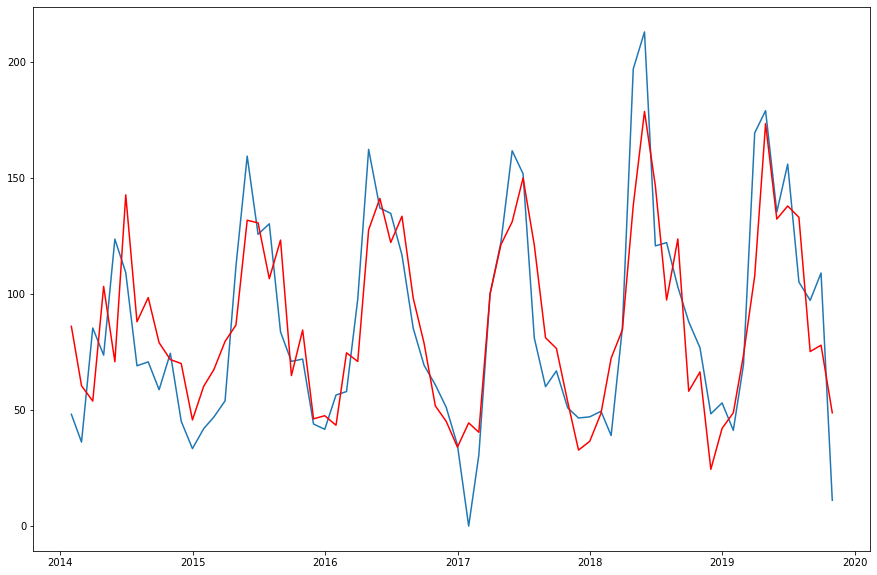

In [71]:

plt.figure(figsize=(15,10))
plt.plot(y2)
plt.plot(model2_fit.predict(), color = 'red')

 ### Forecasting

In [76]:

# create a range of future dates that is the length of the periods to forecast
forecast_period = 24
date_range = pd.date_range(y2.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes predictions

future_months = pd.DataFrame(date_range, columns = ['Month'])
# convert the 'Month' column to a datetime object 
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]


In [77]:
y2.tail()

Month
2019-06-30    156.04
2019-07-31    105.20
2019-08-31     97.30
2019-09-30    109.10
2019-10-31     11.13
Name: antihistamines, dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'append'

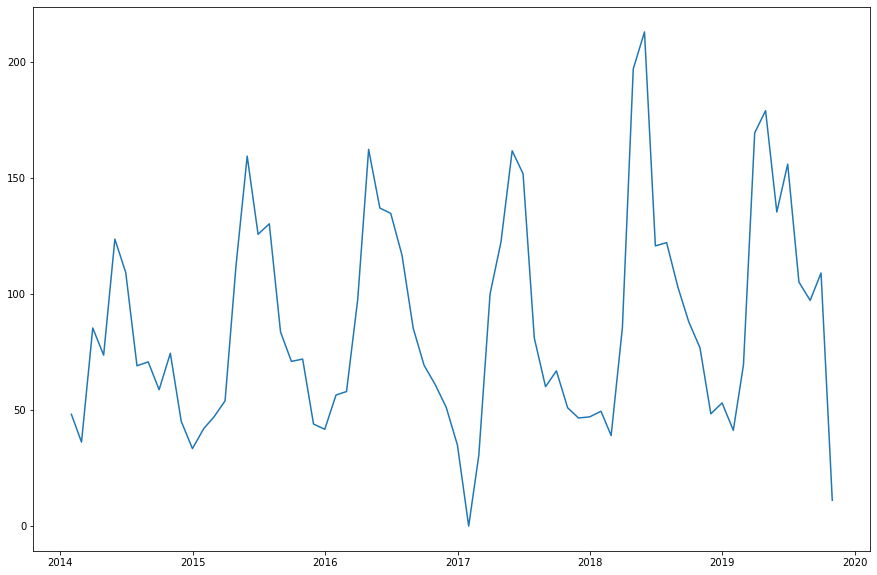

In [78]:
# Plot  future predictions
plt.figure(figsize=(15,10))
plt.plot(y2)
plt.plot(y2['2019-10-31'].append(future_months['Prediction']))
plt.show()